In [1]:
import pandas as pd
from pmdarima import auto_arima
import tool
from sklearn.metrics import mean_squared_error, mean_absolute_percentage_error
import matplotlib.pyplot as plt
import seaborn as sns
from prophet import Prophet
from prophet.plot import add_changepoints_to_plot

In [2]:
train, test = tool.make_monthly_data('IndexPrices__US229.xlsx')

In [3]:
# Prophet using all available data
US229_train, US229_test = tool.data_process("IndexPrices__US229.xlsx")
US229_train.iloc[197,0]
US229_train = US229_train[198:].reset_index(drop=True)
US229_model_obj = Prophet()
US229_forecast = tool.make_forecast(US229_model_obj, US229_train)
tool.timeseries_evaluation_metrics_func(US229_train.y,US229_forecast[:len(US229_train)].yhat)


09:56:58 - cmdstanpy - INFO - Chain [1] start processing
09:56:58 - cmdstanpy - INFO - Chain [1] done processing


Evaluation metric results:-
MSE is : 663.2525743999
MAE is : 19.9584088407781
RMSE is : 25.75369050058457
MAPE is : 0.07602437421894434
R2 is : 0.6304201019370146


In [4]:
tool.timeseries_evaluation_metrics_func(US229_test.y,US229_forecast[len(US229_train):].yhat)

Evaluation metric results:-
MSE is : 5660.139020660703
MAE is : 55.469911287868435
RMSE is : 75.23389542394241
MAPE is : 0.1525112021820328
R2 is : -0.43978756942199126
Your model is not good enough. Please adjust it.


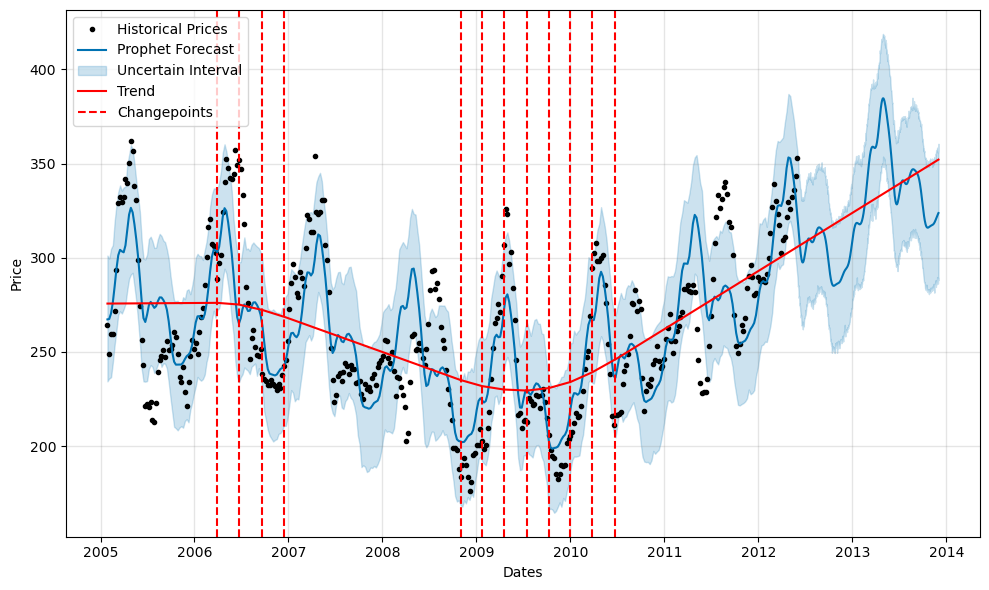

In [5]:
fig = US229_model_obj.plot(US229_forecast)
a = add_changepoints_to_plot(fig.gca(), US229_model_obj, US229_forecast)
plt.xlabel("Dates")
plt.ylabel("Price")
plt.legend(["Historical Prices", "Prophet Forecast", "Uncertain Interval", "Trend", "Changepoints"],loc='upper left')